# Binärgewitter 2024

Tagline?
Let's take a look:
Zuerst müssen wir alle librarys importieren und Daten laden.

In [1]:
import pandas as pd
import datetime
import calmap

In [2]:
year = 2024

In [3]:
podcasts = pd.read_csv(f"data/{year}.csv", sep=",")

In [4]:
def parse_duration(duration_str):
    hours, minutes, seconds = map(int, duration_str.split(':'))
    return datetime.timedelta(hours=hours, minutes=minutes, seconds=seconds)

In [5]:
podcasts["Duration"] = podcasts["Duration"].transform(parse_duration)
podcasts["Record Date"] = podcasts["Record Date"].transform(datetime.date.fromisoformat)
podcasts["Release Date"] = podcasts["Release Date"].transform(datetime.date.fromisoformat)

## Übersicht

Diese Jahr habe wir einige Sendungen veröffentlicht:

In [6]:
talk = podcasts[podcasts.Type == "Talk"]
westcoast = podcasts[podcasts.Type == "Westcoast"]

In [7]:
print(f"Talk:      {len(talk)}")
print(f"Westcoast: {len(westcoast)}")
print(f"Total:     {len(podcasts)}")

Talk:      22
Westcoast: 0
Total:     22


2024 haben wir 22 Sendungen gemacht! Das letzte mal als wir so viele Sendungen hatten war 2020.

## Binärgewitter Talk

In [8]:
year_length =  datetime.date(year+1, 1, 1) - datetime.date(year, 1, 1)  # works for leap years, too
print(f"Für Binärgewitter Talk sind das alle {(year_length / len(talk)).days} Tage eine Sendung.")

Für Binärgewitter Talk sind das alle 16 Tage eine Sendung.


Wir schauen uns nun die Binärgewitter Talk Sendungen genauer an.

In [9]:
talk.loc[:, (talk != 0).any(axis=0)]  # alle hosts auslassen, die nie da waren

,Name,Release Date,Record Date,Type,Duration,ingo,l33tname,madmas,makefu
0,Binärgewitter Talk #350: Wir haben doch keine ...,2024-12-28,2024-12-28,Talk,0 days 01:02:24,1,0,1,1
1,Binärgewitter Talk #349: Blauhelm Browser,2024-12-11,2024-11-10,Talk,0 days 02:23:12,1,1,1,1
2,Binärgewitter Talk #348: Nicht mehr ganz Knusper,2024-11-20,2024-11-19,Talk,0 days 02:02:42,1,1,1,0
3,Binärgewitter Talk #347: DRM Brennstäbe,2024-11-09,2024-11-08,Talk,0 days 01:15:08,1,0,1,1
4,Binärgewitter Talk #346: Duoingo,2024-10-26,2024-10-25,Talk,0 days 02:07:34,1,1,0,1
5,Binärgewitter Talk #345: zu Ingos Studienzeiten,2024-10-14,2024-10-13,Talk,0 days 02:35:36,1,1,1,1
6,Binärgewitter Talk #344: Das Internet ist rund,2024-10-01,2024-09-30,Talk,0 days 02:24:53,1,1,1,1
7,Binärgewitter Talk #343: Alle 10 Jahre updaten,2024-09-12,2024-09-10,Talk,0 days 02:26:24,1,1,1,1
8,Binärgewitter Talk #342: Doppeldiskettenbrief,2024-08-21,2024-08-19,Talk,0 days 02:24:04,0,1,1,1
9,Binärgewitter Talk #341: Meister Aider,2024-08-03,2024-08-02,Talk,0 days 02:29:47,1,1,1,1


### Sendungen pro Host:

In [10]:
podcasters = ["ingo", "l33tname", "madmas", "makefu", "pfleidi", "marc"]
teilnahmen_pro_host = podcasts[podcasters].sum()
sendezeit_pro_host = podcasts[podcasters].apply(lambda anwesenheit: (anwesenheit * podcasts['Duration']).sum())

pd.DataFrame({
    "Episodenzahl": teilnahmen_pro_host,
    "Episodenzahl Anteil in %": (100 * teilnahmen_pro_host / len(podcasts)) .astype(int),
    "Sendezeit": sendezeit_pro_host,
    "Sendezeit Anteil in %": (100 * sendezeit_pro_host / podcasts["Duration"].sum()).astype(int),
})


,Episodenzahl,Episodenzahl Anteil in %,Sendezeit,Sendezeit Anteil in %
ingo,20,90,1 days 22:07:59,90
l33tname,18,81,1 days 19:33:51,85
madmas,17,77,1 days 15:52:48,78
makefu,20,90,1 days 22:43:58,91
pfleidi,0,0,0 days 00:00:00,0
marc,0,0,0 days 00:00:00,0


Niemand war für alle Sendungen hier, alle haben die eine oder andere Sendung verpasst.

### Duration

Da der Feed jetzt eine duration pro Sendung angibt kann man jetzt auch interessante Auswertungen machen.

In [11]:
durations = podcasts["Duration"]

In [12]:
print(f"""
Unsere totale Sendezeit war dieses Jahr {durations.sum()}.
Die Sendung dauerten zwischen {durations.min()} und {durations.max()},
im Schnitt {durations.mean()}, im median {durations.median()}.
""")


Unsere totale Sendezeit war dieses Jahr 2 days 02:48:51.
Die Sendung dauerten zwischen 0 days 01:02:24 und 0 days 03:21:20,
im Schnitt 0 days 02:18:35.045454545, im median 0 days 02:24:28.500000.



Hier sind ein paar lieblos hingeklatschte Statistiken zur Sendezeit.

In [13]:
durations.describe()

count                           22
mean     0 days 02:18:35.045454545
std      0 days 00:29:35.852698665
min                0 days 01:02:24
25%                0 days 02:06:09
50%         0 days 02:24:28.500000
75%                0 days 02:34:16
max                0 days 03:21:20
Name: Duration, dtype: object

Hier sind die kürzeste und die längste Episode des Jahres.

In [14]:
pd.concat([
    podcasts.loc[durations.idxmin()],
    podcasts.loc[durations.idxmax()]
], axis=1).T

,Name,Release Date,Record Date,Type,Duration,ingo,l33tname,madmas,makefu,pfleidi,marc
0,Binärgewitter Talk #350: Wir haben doch keine ...,2024-12-28,2024-12-28,Talk,0 days 01:02:24,1,0,1,1,0,0
14,Binärgewitter Talk #336: 18 Euro Mediathek,2024-05-10,2024-05-09,Talk,0 days 03:21:20,1,1,1,1,0,0


### Recording datum

Hier sehen wir, an welchen Tagen wir aufnehmen.

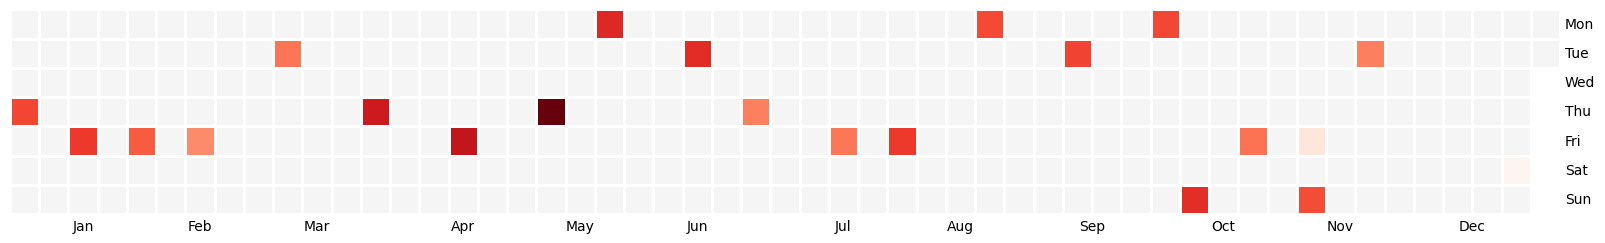

In [13]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,20

release_date = talk
release_date.index = pd.to_datetime(release_date["Record Date"], format="%Y-%m-%d")
calmap.yearplot(release_date['Duration_sec']);

## Bearbeitungszeit

Wie viele Tage sind zwischen Aufzeichnung und Release vergangen?

In [15]:
podcasts["Delay"] = delays = podcasts["Release Date"]-podcasts["Record Date"]

<Axes: title={'center': 'Bearbeitungszeit'}, ylabel='Frequency'>

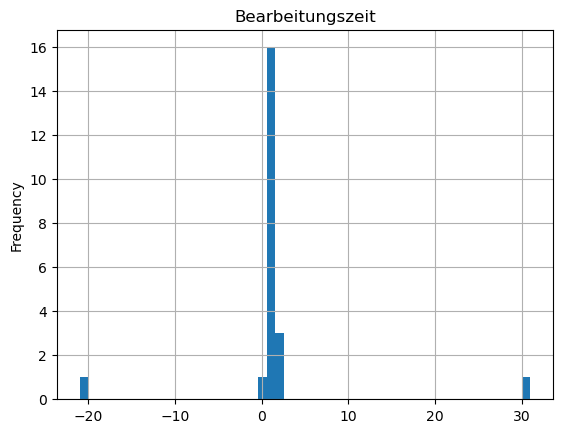

In [16]:
delays.transform(lambda delay: delay.days).plot(
    kind='hist',
    title="Bearbeitungszeit",
    bins=1 + (delays.max() - delays.min()).days,
    grid=True
)

Da scheint wohl etwas mit den Rohdaten nicht zu stimmen.